In [72]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import numpy as np
import itertools
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
from collections import deque

In [73]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [74]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [75]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
X = X[1:]
X
y = y[1:]

In [76]:
X

,pregnant,insulin,bmi,age,glucose,bp,pedigree
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
764,10,180,32.9,63,101,76,0.171
765,2,0,36.8,27,122,70,0.34
766,5,112,26.2,30,121,72,0.245
767,1,0,30.1,47,126,60,0.349


In [77]:
y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: label, Length: 768, dtype: object

In [78]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_test


,pregnant,insulin,bmi,age,glucose,bp,pedigree
286,7,135,26,51,136,74,0.647
102,1,0,26.1,22,151,60,0.179
582,6,0,25,27,109,60,0.206
353,3,0,34.4,46,61,82,0.243
727,1,180,36.1,25,116,78,0.496
...,...,...,...,...,...,...,...
242,4,88,33.1,22,91,70,0.446
600,1,120,23.1,26,109,38,0.407
651,1,100,25.2,23,91,54,0.234
12,10,0,38,34,168,74,0.537


In [79]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
286,7,135,26,51,136,74,0.647
102,1,0,26.1,22,151,60,0.179
582,6,0,25,27,109,60,0.206
353,3,0,34.4,46,61,82,0.243
727,1,180,36.1,25,116,78,0.496
...,...,...,...,...,...,...,...
242,4,88,33.1,22,91,70,0.446
600,1,120,23.1,26,109,38,0.407
651,1,100,25.2,23,91,54,0.234
12,10,0,38,34,168,74,0.537


In [80]:
X_train

,pregnant,insulin,bmi,age,glucose,bp,pedigree
89,15,110,37.1,43,136,70,0.153
468,0,100,36.8,25,97,64,0.6
551,1,0,27.4,21,116,70,0.204
148,2,119,30.5,34,106,64,1.4
482,0,0,35.2,29,123,88,0.197
...,...,...,...,...,...,...,...
646,2,440,39.4,30,157,74,0.134
716,7,392,33.9,34,187,50,0.826
73,13,0,43.4,42,126,90,0.583
236,4,0,43.6,26,171,72,0.479


In [81]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [82]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [83]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [84]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [85]:
clf = DecisionTreeClassifier(criterion="entropy", splitter ="random")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7359307359307359


In [86]:
clf = DecisionTreeClassifier(max_depth=3, splitter ="best")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


In [87]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


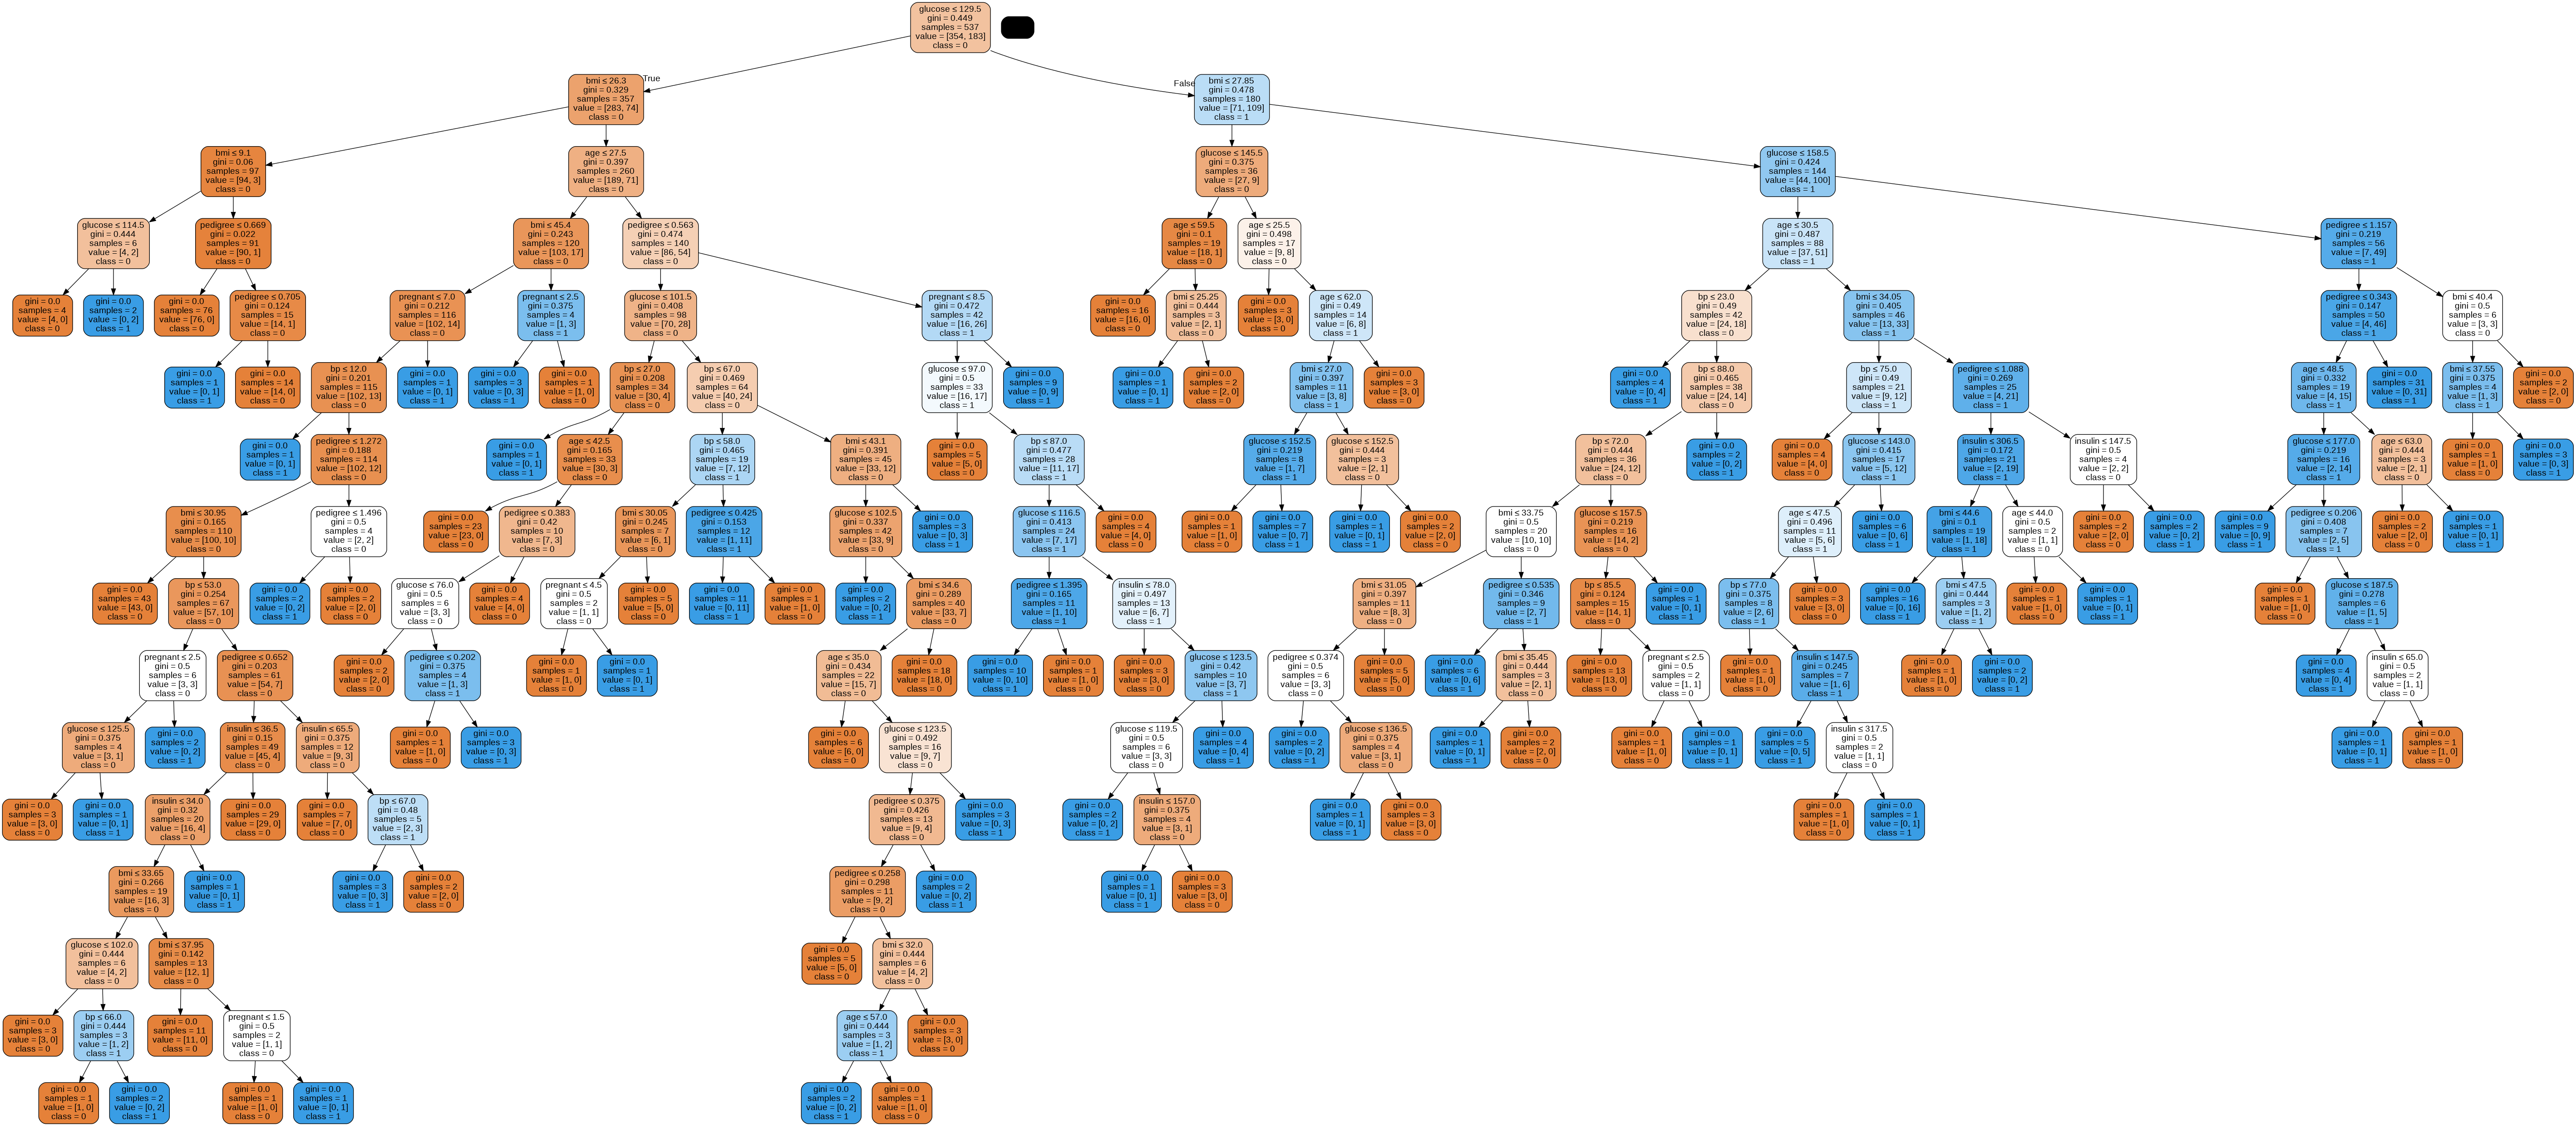

In [88]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

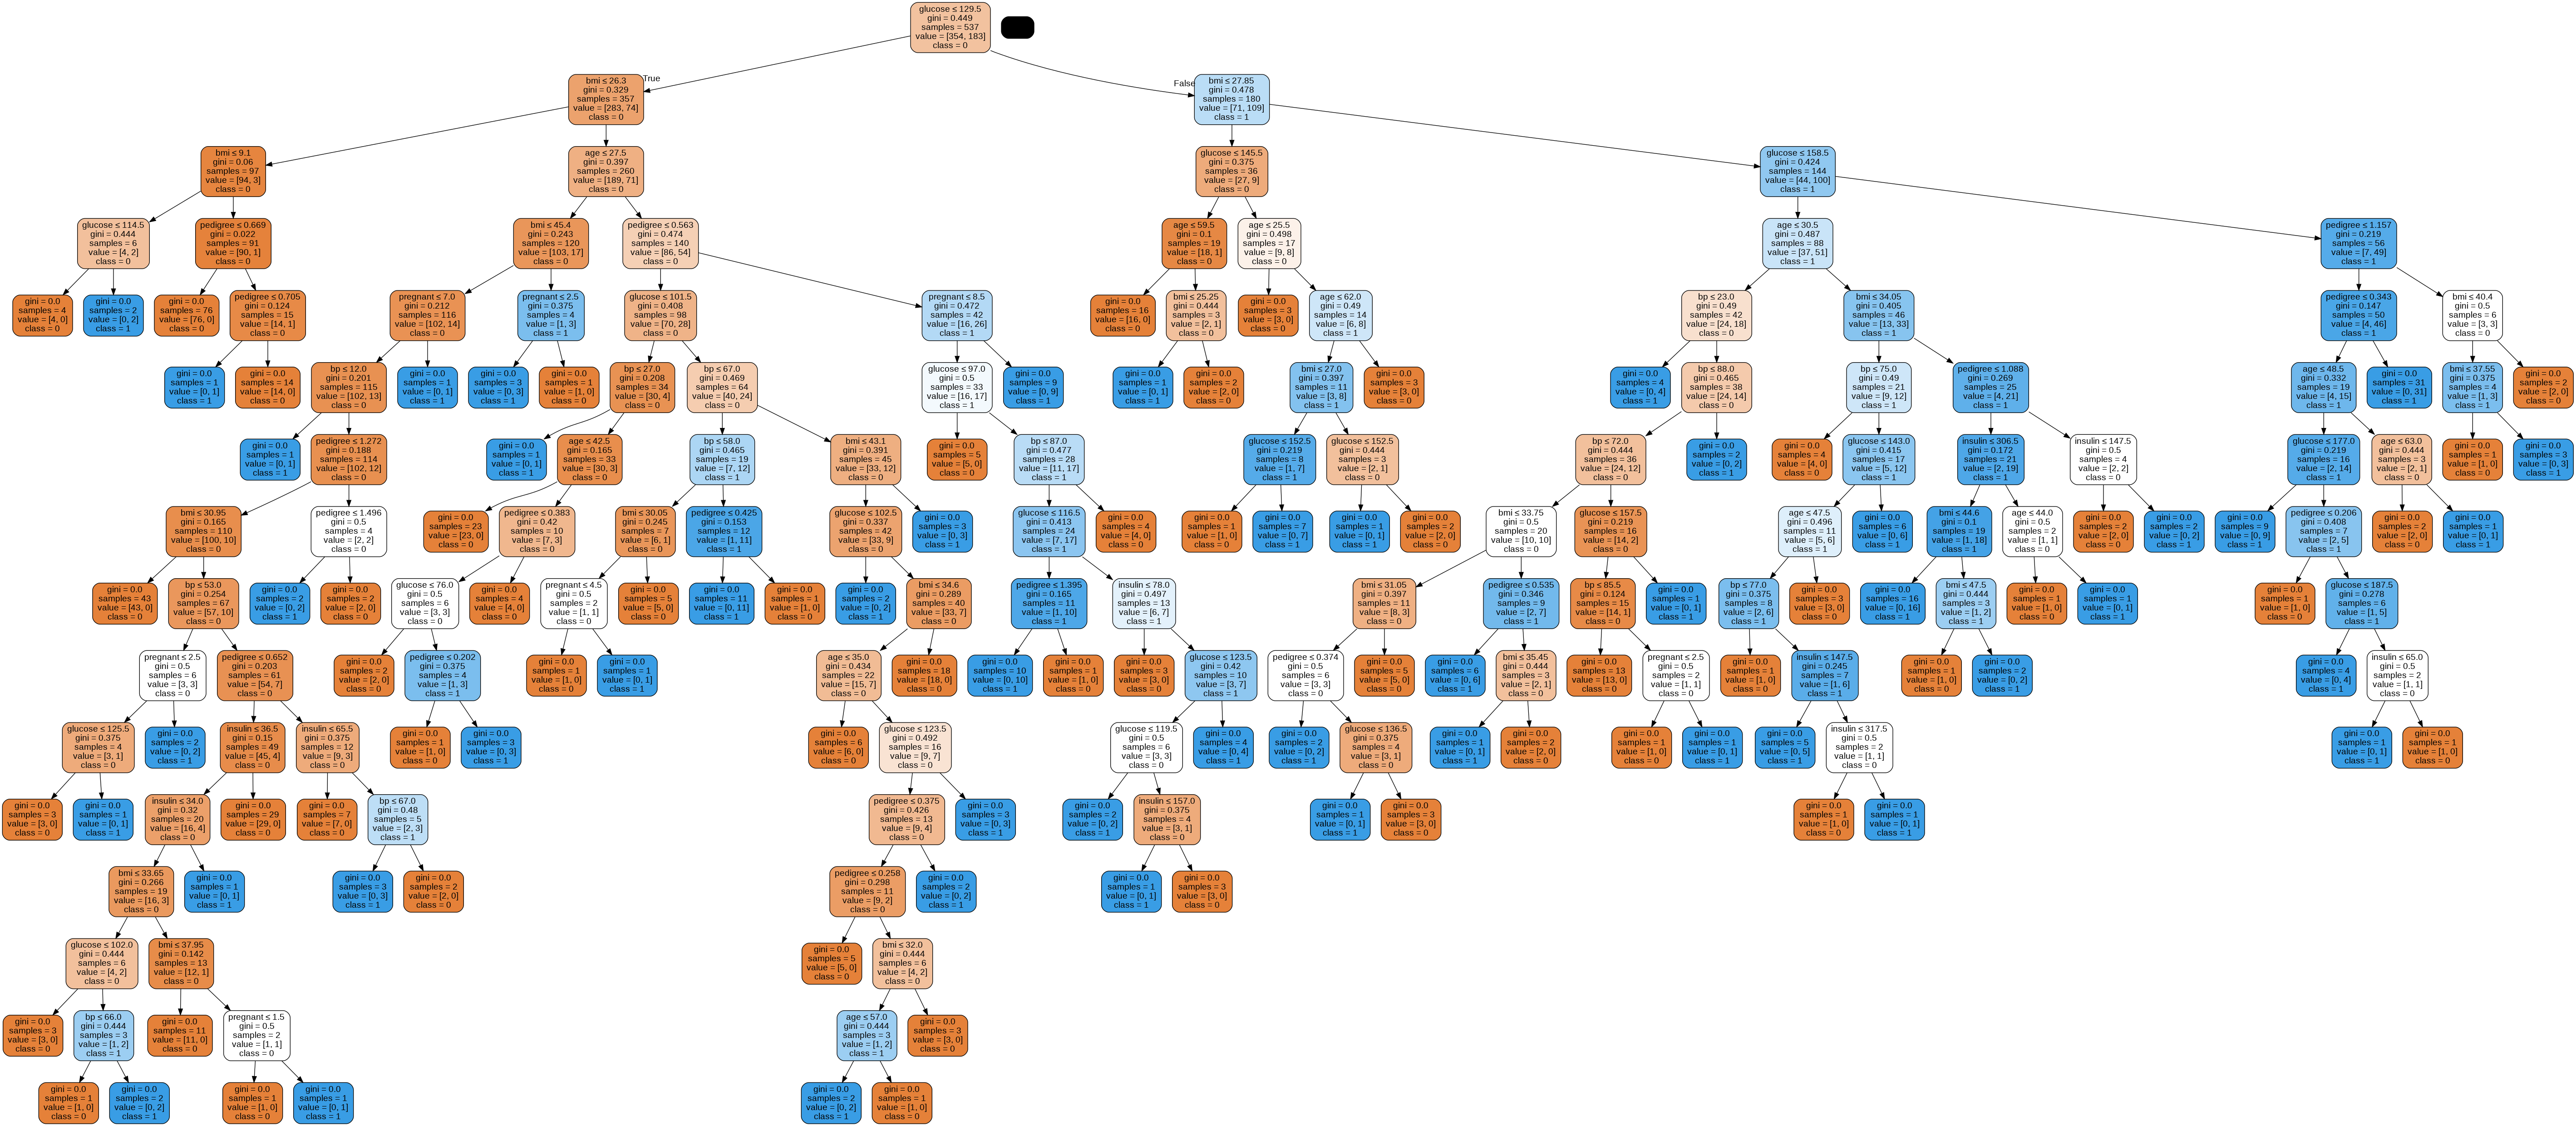

In [89]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

[[113  33]
 [ 44  41]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


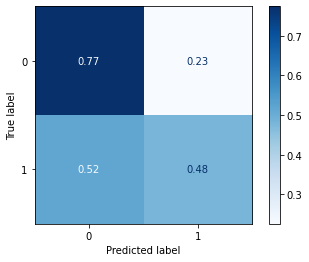

In [90]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues,normalize='true') 

In [91]:
#Complete Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       146
           1       0.55      0.48      0.52        85

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231



In [92]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap, vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title, y=1.25)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1line.set_visible(False)
        t.tick2line.set_visible(False)
    for t in ax.yaxis.get_major_ticks():
        t.tick1line.set_visible(False)
        t.tick2line.set_visible(False)

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, number_of_classes=2, title='Classification report ', cmap='RdYlGn'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')
    
    #drop initial lines
    lines = lines[2:]

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[: number_of_classes]:
        t = list(filter(None, line.strip().split('  ')))
        if len(t) < 4: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)


    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 10
    figure_height = len(class_names) + 3
    correct_orientation = True
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       146
           1       0.55      0.48      0.52        85

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231



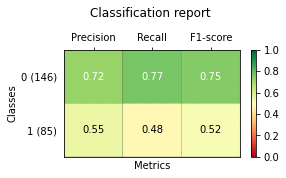

In [93]:
report = classification_report(y_test, y_pred)
print (report)
plot_classification_report(report)


In [94]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='sigmoid', C=1.0) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

Accuracy: 0.4588744588744589


In [95]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='linear', C=1.0) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

Accuracy: 0.7835497835497836


In [96]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='rbf', C=1.0) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

Accuracy: 0.7662337662337663
